# ЦЕЛИ АНАЛИЗА ДАННЫХ
1. Проверка гипотезы о нормальном распределении генеральной совокупности по критерию Пирсона (критерию хи квадрат)

2. Основные выборочные характеристики

3. Измерение взаимной зависимости

4. Расчет коэффициентов линейного уравнения регрессии

5. Оценка адекватности регрессионной модели

### Загрузка исходных данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm
from scipy.stats import chi2
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data_DS.csv')

In [3]:
df

,Year,4,5,6
0,1957,3.7,3.8,6.7
1,1958,3.5,3.2,5.9
2,1959,2.4,3.2,5.2
3,1960,2.6,3.5,4.8
4,1961,2.6,3.4,4.4
5,1962,3.6,5.5,4.8
6,1963,3.0,2.7,5.4
7,1964,2.4,3.2,5.6
8,1965,2.5,4.0,5.4
9,1966,3.3,4.5,5.5


### Построить графики трех исходных рядов температуры воды

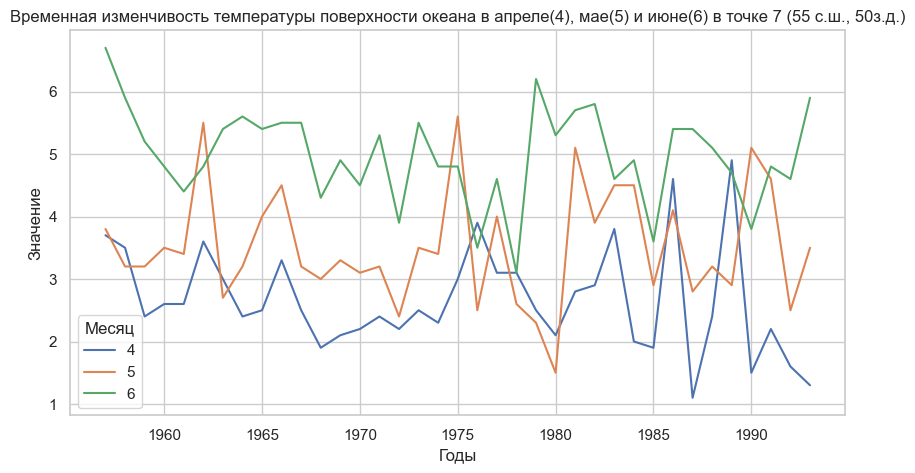

In [4]:
sns.set(style="whitegrid")

df_melted = df.melt(id_vars='Year', var_name='Month', value_name='Value')

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_melted, x='Year', y='Value', hue='Month')

plt.title('Временная изменчивость температуры поверхности океана в апреле(4), мае(5) и июне(6) в точке 7 (55 с.ш., 50з.д.)')
plt.xlabel('Годы')
plt.ylabel('Значение')
plt.legend(title='Месяц')
plt.show()

 ### Проверка гипотезы о нормальном распределении генеральной совокупности по критерию Пирсона
 для апреля (4го)

1. Определение минимального и максимального значений:
$x_{\text{min}} = \min x_i, \quad x_{\text{max}} = \max x_i, \quad i = 1, n$

2. Вычисление размаха выборки:
$R = x_{\text{max}} - x_{\text{min}}$

3. Определение числа интервалов по формуле Стерджеса:
$N = 1 + \lfloor 3.322 \log_{2} n \rfloor$
где n — объем выборки.

4. Вычисление длины интервала:
$h = \frac{R}{N}$

5. Определение границ интервалов:
$
a_1 = x_{\text{min}}, \quad a_2 = a_1 + h = x_{\text{min}} + h, \quad a_3 = a_2 + h = x_{\text{min}} + 2h, \ldots, a_{N+1} = a_N + h = x_{\text{min}} + Nh
$

6. Вычисление середины интервалов:
$
x(i) = \frac{a_i + a_{i+1}}{2}
$

7. Вычисление выборочного среднего:
$
\bar{x} = \frac{1}{n} \sum_{i=1}^{N} m_i x(i)
$
где \( m_i \) — абсолютные частоты.

8. Вычисление выборочного среднеквадратического отклонения:
$
S_n = \sqrt{\frac{1}{n} \sum_{i=1}^{N} m_i (x(i) - \bar{x})^2}
$

9. Переход к нормированным величинам:
$
z_i = a_i - \bar{x}, \quad z_{i+1} = a_{i+1} - \bar{x}
$
где \( z_1 = -\infty \) и \( z_{N+1} = +\infty \).

10. Вычисление теоретических частот:
$
\Phi_0(z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{z} e^{-u^2/2} du
$
$
m_i' = n P_i, \quad P_i = \Phi_0(z_{i+1}) - \Phi_0(z_i)
$
где $( \Phi_0(-z) = -\Phi_0(z)), ( \Phi_0(-\infty) = -0.5), ( \Phi_0(+\infty) = 0.5)$

In [5]:
df.shape

(37, 4)

In [6]:
#минимальное и максимальное значения
xmin = df['4'].min()
xmax = df['4'].max()

#размах (диапазон) выборки
R = xmax-xmin

#количество интервалов по формуле Стерджеса
n = len(df)
N = round(1 + 3.322 * np.log10(n))

#величина интервала
h = (xmax - xmin) / N

#границы интервалов
intervals = [(xmin + i * h, xmin + (i + 1) * h) for i in range(N)]

#абсолютные частоты
absolute_frequencies = []
for interval in intervals:
    count = df[(df['4'] >= interval[0]) & (df['4'] < interval[1])].shape[0]
    absolute_frequencies.append(count)

#относительные частоты
relative_frequencies = [f / n for f in absolute_frequencies]

#середины интервалов
midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

#выполнение условий нормировки для абсолютных и относительных частот
absolute_sum = sum(absolute_frequencies)
relative_sum = sum(relative_frequencies)

result_df = pd.DataFrame({
    'Интервал': [f'({interval[0]:.2f}, {interval[1]:.2f})' for interval in intervals],
    'Абсолютная частота (mi)': absolute_frequencies,
    'Относительная частота (wi)': relative_frequencies,
    'Середина интервала (xi)': midpoints
})

print(f'Минимальное значение: {xmin}')
print(f'Максимальное значение: {xmax}')
print(f'Размах (диапазон) выборки: {R:.1f}')
print(f'Количество интервалов по формуле Стерджеса: {N}')
print(f'Величина интервала {h:.2f}')
print(f'\nСумма абсолютных частот: {absolute_sum}')
print(f'Сумма относительных частот: {relative_sum:.4f}')
result_df

Минимальное значение: 1.1
Максимальное значение: 4.9
Размах (диапазон) выборки: 3.8
Количество интервалов по формуле Стерджеса: 6
Величина интервала 0.63

Сумма абсолютных частот: 36
Сумма относительных частот: 0.9730


,Интервал,Абсолютная частота (mi),Относительная частота (wi),Середина интервала (xi)
0,"(1.10, 1.73)",4,0.108108,1.416667
1,"(1.73, 2.37)",9,0.243243,2.050000
2,"(2.37, 3.00)",14,0.378378,2.683333
3,"(3.00, 3.63)",5,0.135135,3.316667
4,"(3.63, 4.27)",3,0.081081,3.950000
5,"(4.27, 4.90)",1,0.027027,4.583333


По имеющемуся интервальному вариационному ряду 
### построить гистограмму и полигон распределения абсолютных частот

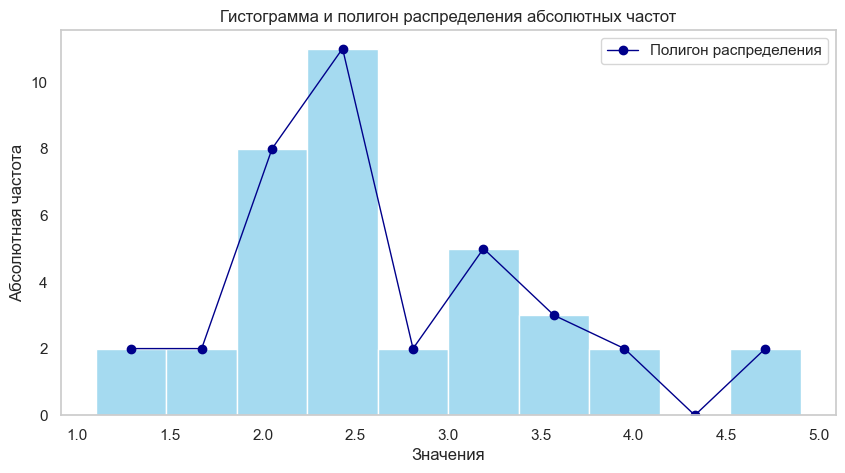

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['4'], bins=10, kde=False, color='skyblue', stat='count')


n, bins = np.histogram(df['4'], bins=10)
midpoints = 0.5 * (bins[1:] + bins[:-1])

plt.plot(midpoints, n, marker='o', color='darkblue', label='Полигон распределения', linewidth=1)

plt.title('Гистограмма и полигон распределения абсолютных частот')
plt.xlabel('Значения')
plt.ylabel('Абсолютная частота')
plt.legend()
plt.grid()

plt.show()

***Полигон распределения — это график, который показывает распределение абсолютных частот в виде линии, соединяющей середины интервалов***

In [8]:
data = {
    'Интервал': ['(1.10, 1.73)', '(1.73, 2.37)', '(2.37, 3.00)', 
                 '(3.00, 3.63)', '(3.63, 4.27)', '(4.27, 4.90)'],
    'Абсолютная частота (mi)': [4, 9, 14, 5, 3, 1],
    'Середина интервала (xi)': [1.416667, 2.050000, 2.683333, 
                                 3.316667, 3.950000, 4.583333]
}

df_by_parts = pd.DataFrame(data)

n = df_by_parts['Абсолютная частота (mi)'].sum()

#выборочное среднее
x_mean = (df_by_parts['Абсолютная частота (mi)'] * df_by_parts['Середина интервала (xi)']).sum() / n

#выборочное среднее квадратическое отклонение
S_n = np.sqrt(((df_by_parts['Абсолютная частота (mi)'] * (df_by_parts['Середина интервала (xi)'] - x_mean) ** 2).sum()) / n)

print(f'Выборочное среднее x: {x_mean:.4f}')
print(f'Выборочное среднее квадратическое отклонение Sn: {S_n:.4f}')

Выборочное среднее x: 2.6306
Выборочное среднее квадратическое отклонение Sn: 0.7520


In [9]:
#переход к нормированным величинам
a_i = [1.10, 1.73, 2.37, 3.00, 3.63, 4.27]
a_i1 = [1.73, 2.37, 3.00, 3.63, 4.27, 4.90]

#вычисление нормированных величин
z_i = [round((a - x_mean) / S_n, 2) for a in a_i]
z_i1 = [round((a- x_mean) / S_n, 2) for a in a_i1]
z1 = -np.inf
zN_plus_1 = np.inf

z_values = [z1] + z_i[1:]
z_i1_values = z_i1[:-1] + [zN_plus_1] 
a_i_values = a_i
a_i1_values = a_i1

df_by_parts['ai'] = a_i_values
df_by_parts['ai+1'] = a_i1_values
df_by_parts['zi'] = z_values
df_by_parts['zi+1'] = z_i1_values

In [10]:
df_by_parts

,Интервал,Абсолютная частота (mi),Середина интервала (xi),ai,ai+1,zi,zi+1
0,"(1.10, 1.73)",4,1.416667,1.10,1.73,-inf,-1.20
1,"(1.73, 2.37)",9,2.050000,1.73,2.37,-1.20,-0.35
2,"(2.37, 3.00)",14,2.683333,2.37,3.00,-0.35,0.49
3,"(3.00, 3.63)",5,3.316667,3.00,3.63,0.49,1.33
4,"(3.63, 4.27)",3,3.950000,3.63,4.27,1.33,2.18
5,"(4.27, 4.90)",1,4.583333,4.27,4.90,2.18,inf


***Смотрим значения функций Лапласа в таблице***

In [11]:
#Ф0(–z) = – Ф0(z)
phi_values = {
    -np.inf: -0.5,
    -1.20: -0.3849,
    -0.35: -0.1368,
    0.49: 0.1879,
    1.33: 0.4082,
    2.18: 0.4854,
    np.inf: 0.5
}

phi_z_i = [-0.5, -0.3849, -0.1368, 0.1879, 0.4082, 0.4854]
phi_z_i1 = [-0.3849, -0.1368, 0.1879, 0.4082, 0.4854, 0.5] 

#вычисление вероятностей P_i
P_i = [phi_z_i1[i] - phi_z_i[i] for i in range(len(z_i))]

#вычисление теоретических частот
mi_prime = [n * p for p in P_i]

df_by_parts['Φ0(zi)'] = phi_z_i
df_by_parts['Φ0(zi+1)'] = phi_z_i1
df_by_parts['Pi'] = P_i
df_by_parts['mi\''] = mi_prime

print(df_by_parts[['Интервал', 'zi', 'zi+1', 'Φ0(zi)', 'Φ0(zi+1)', 'Pi', 'mi\'']])

       Интервал    zi  zi+1  Φ0(zi)  Φ0(zi+1)      Pi      mi'
0  (1.10, 1.73)  -inf -1.20 -0.5000   -0.3849  0.1151   4.1436
1  (1.73, 2.37) -1.20 -0.35 -0.3849   -0.1368  0.2481   8.9316
2  (2.37, 3.00) -0.35  0.49 -0.1368    0.1879  0.3247  11.6892
3  (3.00, 3.63)  0.49  1.33  0.1879    0.4082  0.2203   7.9308
4  (3.63, 4.27)  1.33  2.18  0.4082    0.4854  0.0772   2.7792
5  (4.27, 4.90)  2.18   inf  0.4854    0.5000  0.0146   0.5256


***Интервалы, содержащие малочисленные эмпирические частоты
(mi < 5), следует объединить, а частоты этих интервалов сложить. В этом случае и соответствующие им теоретические частоты также надо сложить***

In [12]:
data = {
    'Интервал': ['(1.10, 2.37)', '(2.37, 3.00)', '(3.00, 3.63)', '(3.63, 4.90)'],
    'zi': [-float('inf'), -0.35, 0.49, 1.33],
    'zi+1': [-0.35, 0.49, 1.33, float('inf')],
    'Φ0(zi)': [-0.5000, -0.1368, 0.1879, 0.4082],
    'Φ0(zi+1)': [-0.1368, 0.1879, 0.4082, 0.5000],
    'Pi': [0.3632, 0.3247, 0.2203, 0.0918],
    'mi\'': [13.4384, 12.0139, 8.1511, 3.3966],
    'mi': [13, 14, 5, 4]
}

df_try = pd.DataFrame(data)
k = 1

print(f"\nЧисло степеней свободы k = {k}")


Число степеней свободы k = 1


***Для оценки степени приближения выборочного распределения к теоретической кривой***, вычисляем наблюдаемое значение критерия $(\chi^2_{\text{набл}})$:

$
\chi^2_{\text{набл}} = \sum_{i=1}^{N} \frac{(m_i' - m_i)^2}{m_i}
$

где $( m_i' )$ — теоретические частоты, а $(m_i)$ — наблюдаемые частоты.

In [13]:
df_try['(mi - mi\')² / mi\''] = (df_try['mi'] - df_try['mi\'']) ** 2 / df_try['mi\'']  #пересчитываем χ²
chi_squared_nabl = df_try['(mi - mi\')² / mi\''].sum()

k = 1

#уровень значимости α1
alpha_1 = 0.025
critical_value_1 = chi2.ppf(1 - alpha_1, k)
#уровень значимости α2
alpha_2 = 0.01
critical_value_2 = chi2.ppf(1 - alpha_2, k)

print(f"Наблюдаемое значение χ²: {chi_squared_nabl}")
print(f"Критическая точка χ²1(α={alpha_1}; k={k}): {critical_value_1}")
print(f"Критическая точка χ²2(α={alpha_2}; k={k}): {critical_value_2}")
df_try

Наблюдаемое значение χ²: 1.6680013196399037
Критическая точка χ²1(α=0.025; k=1): 5.02388618731489
Критическая точка χ²2(α=0.01; k=1): 6.634896601021215


,Интервал,zi,zi+1,Φ0(zi),Φ0(zi+1),Pi,mi',mi,(mi - mi')² / mi'
0,"(1.10, 2.37)",-inf,-0.35,-0.5000,-0.1368,0.3632,13.4384,13,0.014302
1,"(2.37, 3.00)",-0.35,0.49,-0.1368,0.1879,0.3247,12.0139,14,0.328336
2,"(3.00, 3.63)",0.49,1.33,0.1879,0.4082,0.2203,8.1511,5,1.218171
3,"(3.63, 4.90)",1.33,inf,0.4082,0.5000,0.0918,3.3966,4,0.107193


In [14]:
#для отчета вывод в определенном ФОРМАТЕ
stats_data = {
    'Объем выборки (n)': [37],
    'Минимальное значение (xmin)': [1.1],
    'Максимальное значение (xmax)': [4.9],
    'Размах (R)': [3.8],
    'Число интервалов (N)': [6],
    'Величина интервалов (h)': [0.63],
    'Выборочное среднее (x)': [2.6306],
    'Выборочное среднеквадратическое отклонение (S_n)': [0.7520],
    'χ²набл': [1.668],
    'Число степеней свободы (k)': [1],
    'Первый уровень значимости (α1)': [0.025],
    'χ²кр(α1; k)': [5.024],
    'Второй уровень значимости (α2)': [0.01],
    'χ²кр(α2; k)': [6.635]
}


df_stats = pd.DataFrame(stats_data)
df_stats_transposed = df_stats.T
df_stats_transposed = df_stats_transposed.apply(lambda x: x.astype(str).str.ljust(10))

print(df_stats_transposed)

                                                           0
Объем выборки (n)                                 37.0      
Минимальное значение (xmin)                       1.1       
Максимальное значение (xmax)                      4.9       
Размах (R)                                        3.8       
Число интервалов (N)                              6.0       
Величина интервалов (h)                           0.63      
Выборочное среднее (x)                            2.6306    
Выборочное среднеквадратическое отклонение (S_n)  0.752     
χ²набл                                            1.668     
Число степеней свободы (k)                        1.0       
Первый уровень значимости (α1)                    0.025     
χ²кр(α1; k)                                       5.024     
Второй уровень значимости (α2)                    0.01      
χ²кр(α2; k)                                       6.635     


### Вывод для уровня значимости α1:
χ2набл (1.668) < χ2кр (5.024), значит, гипотеза о нормальном распределении генеральной совокупности подтверждается .
### Вывод для уровня значимости α2:
χ2набл (1.668) < χ2кр (6.635), значит, гипотеза о нормальном распределении генеральной совокупности подтверждается

# Основные выборочные характеристики

1. **Выборочное среднее (среднее арифметическое)**:
$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i = \sum_{i=1}^{k} m_i x(i)
$
где $(n)$ — длина ряда, $(k)$ — число групп, $( m_i )$ — абсолютные частоты, $(x(i))$ — $(i)$ -ая варианта дискретного вариационного ряда.

2. **Выборочная дисперсия**:
$
S^2_n = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 = \sum_{i=1}^{k} m_i (x(i) - \bar{x})^2
$

3. **Исправленная выборочная дисперсия**:
$
s^2_n = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 = \frac{1}{n-1} \sum_{i=1}^{k} m_i (x(i) - \bar{x})^2
$

4. **Стандартное отклонение (выборочное среднее квадратическое отклонение)**:
$
S_n = \sqrt{S^2_n}
$

5. **Коэффициент вариации**:
$
V_S = \frac{S_n}{\bar{x}}
$

6. **Коэффициент асимметрии**:
$
A_s = \frac{3 \sum_{i=1}^{n} (x_i - \bar{x})}{n S_n}
$

7. **Коэффициент эксцесса**:
$
E_x = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^4 - 3
$

8. **Медиана**:
$
M_e =
\begin{cases}
x^*_{(l+1)}, & n = 2l + 1 \\
\frac{x^*_{(l)} + x^*_{(l+1)}}{2}, & n = 2l
\end{cases}
$
где $( x^*(1) \leq x^*(2) \leq \ldots \leq x^*(n))$.

9. **Мода (или моды)**:
Мода представляет наиболее вероятное (часто встречающееся) значение исходного ряда. 
- Распределение может быть одномодальным, бимодальным или полимодальным.

In [15]:
df.describe()

,Year,4,5,6
count,37.000000,37.000000,37.000000,37.000000
mean,1975.000000,2.659459,3.518919,4.978378
std,10.824355,0.841777,0.930304,0.771051
min,1957.000000,1.100000,1.500000,3.100000
25%,1966.000000,2.200000,2.900000,4.600000
50%,1975.000000,2.500000,3.300000,4.900000
75%,1984.000000,3.100000,4.000000,5.500000
max,1993.000000,4.900000,5.600000,6.700000


### РАСЧЕТЫ С ПОМОЩЬЮ ВСТРОЕННЫХ ФУНКЦИЙ

In [16]:
def characteristics(column):
    n=len(column)
    mean = round(column.mean(), 2) #выборочное среднее (среднее арифметическое)
    var = round(column.var(ddof=0), 2)  #выборочная дисперсию
    corrected_var = round(column.var(ddof=1), 2) #исправленная выборочная дисперсию
    std = round(column.std(), 2) #стандартное отклонение (выборочное среднее квадратическое отклонение)
    vc = round(std/mean, 2) #коэффициент вариации = стандартное отклонение/выборочное среднее
    c_asymmetry = round(column.skew(), 2) #коэффициент асимметрии
    c_excess = round(column.kurtosis(), 2)#коэффициент эксцесса
    median = round(column.median(), 2) #медиана
    mode = round(column.mode(), 2) #мода(или моды)

    return {
        'n': n,
        'mean': mean,
        'var': var,
        'corrected_var': corrected_var,
        'std': std,
        'vc': vc,
        'c_asymmetry': c_asymmetry,
        'c_excess': c_excess,
        'median': median,
        'mode': mode,
    }

***Асимметрией*** называется смещение распределения относительно ее моды. 
Отрицательная асимметрия, или левое смещение кривой, указывает на то, что площадь под графиком больше на левой стороне моды. 
Положительная асимметрия, или правое смещение кривой, указывает на то, что площадь под графиком больше на правой стороне моды.

Коэффициент эксцесса, характеризующий крутость (островершинность и
плосковершинность) эмпирической кривой распределения

In [17]:
results = {}
for col in ['4', '5', '6']:
    results[col] = characteristics(df[col])

In [18]:
for col, stats in results.items():
    print(f"Статистический ряд {col}:")
    print(f"Объем выборки (n): {stats['n']}")
    print(f"Выборочное среднее (x): {stats['mean']:.2f}")
    print(f"Выборочная дисперсия (S^2): {stats['var']:.2f}")
    print(f"Исправленная выборочная дисперсия (s^2): {stats['corrected_var']:.2f}")
    print(f"Стандартное отклонение (S): {stats['std']:.2f}")
    print(f"Коэффициент вариации (CV): {stats['vc']:.2f}")
    print(f"Коэффициент асимметрии: {stats['c_asymmetry']:.2f}")
    print(f"Коэффициент эксцесса: {stats['c_excess']:.2f}")
    print(f"Медиана: {stats['median']:.2f}")
    print(f"Мода: {stats['mode']}")
    print("\n")

Статистический ряд 4:
Объем выборки (n): 37
Выборочное среднее (x): 2.66
Выборочная дисперсия (S^2): 0.69
Исправленная выборочная дисперсия (s^2): 0.71
Стандартное отклонение (S): 0.84
Коэффициент вариации (CV): 0.32
Коэффициент асимметрии: 0.69
Коэффициент эксцесса: 0.64
Медиана: 2.50
Мода: 0    2.4
1    2.5
Name: 4, dtype: float64


Статистический ряд 5:
Объем выборки (n): 37
Выборочное среднее (x): 3.52
Выборочная дисперсия (S^2): 0.84
Исправленная выборочная дисперсия (s^2): 0.87
Стандартное отклонение (S): 0.93
Коэффициент вариации (CV): 0.26
Коэффициент асимметрии: 0.48
Коэффициент эксцесса: 0.04
Медиана: 3.30
Мода: 0    3.2
Name: 5, dtype: float64


Статистический ряд 6:
Объем выборки (n): 37
Выборочное среднее (x): 4.98
Выборочная дисперсия (S^2): 0.58
Исправленная выборочная дисперсия (s^2): 0.59
Стандартное отклонение (S): 0.77
Коэффициент вариации (CV): 0.15
Коэффициент асимметрии: -0.37
Коэффициент эксцесса: 0.29
Медиана: 4.90
Мода: 0    4.8
Name: 6, dtype: float64




### Визуализируем результаты, чтобы увидеть разницу

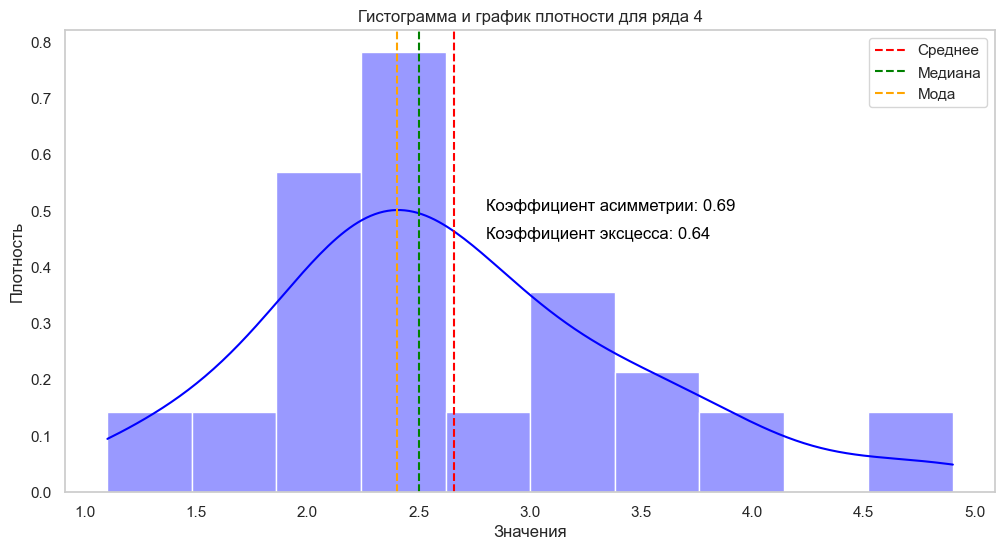

In [19]:
plt.figure(figsize=(12, 6))

sns.histplot(df['4'], kde=True, stat='density', bins=10, color='blue', alpha=0.4)
plt.title('Гистограмма и график плотности для ряда 4')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.axvline(df['4'].mean(), color='red', linestyle='--', label='Среднее')
plt.axvline(df['4'].median(), color='green', linestyle='--', label='Медиана')
plt.axvline(df['4'].mode()[0], color='orange', linestyle='--', label='Мода')

plt.text(x=2.8, y=0.5, s=f'Коэффициент асимметрии: {df["4"].skew():.2f}', fontsize=12, color='black')
plt.text(x=2.8, y=0.45, s=f'Коэффициент эксцесса: {df["4"].kurtosis():.2f}', fontsize=12, color='black')
plt.grid(False)

plt.legend()
plt.show()

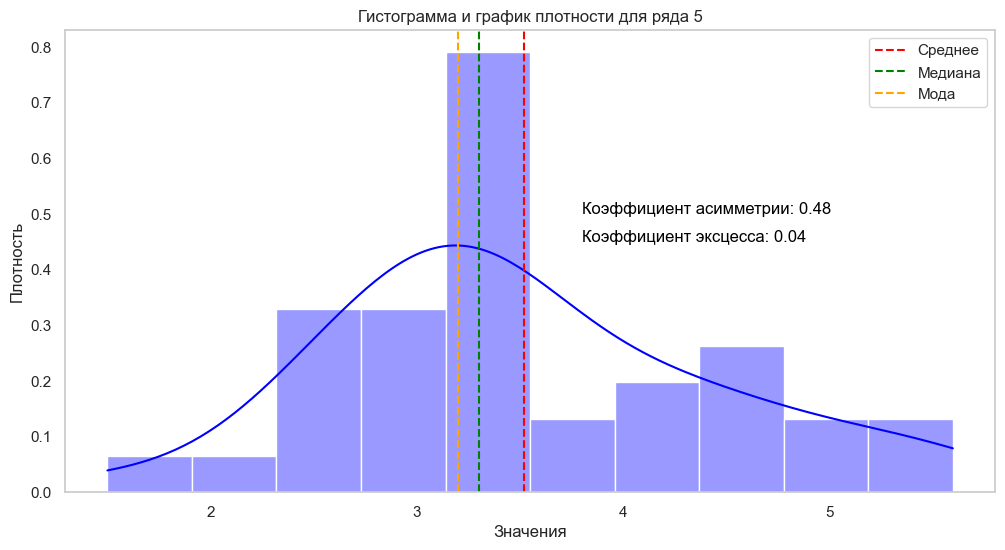

In [20]:
plt.figure(figsize=(12, 6))

sns.histplot(df['5'], kde=True, stat='density', bins=10, color='blue', alpha=0.4)
plt.title('Гистограмма и график плотности для ряда 5')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.axvline(df['5'].mean(), color='red', linestyle='--', label='Среднее')
plt.axvline(df['5'].median(), color='green', linestyle='--', label='Медиана')
plt.axvline(df['5'].mode()[0], color='orange', linestyle='--', label='Мода')

plt.text(x=3.8, y=0.5, s=f'Коэффициент асимметрии: {df["5"].skew():.2f}', fontsize=12, color='black')
plt.text(x=3.8, y=0.45, s=f'Коэффициент эксцесса: {df["5"].kurtosis():.2f}', fontsize=12, color='black')
plt.grid(False)

plt.legend()
plt.show()

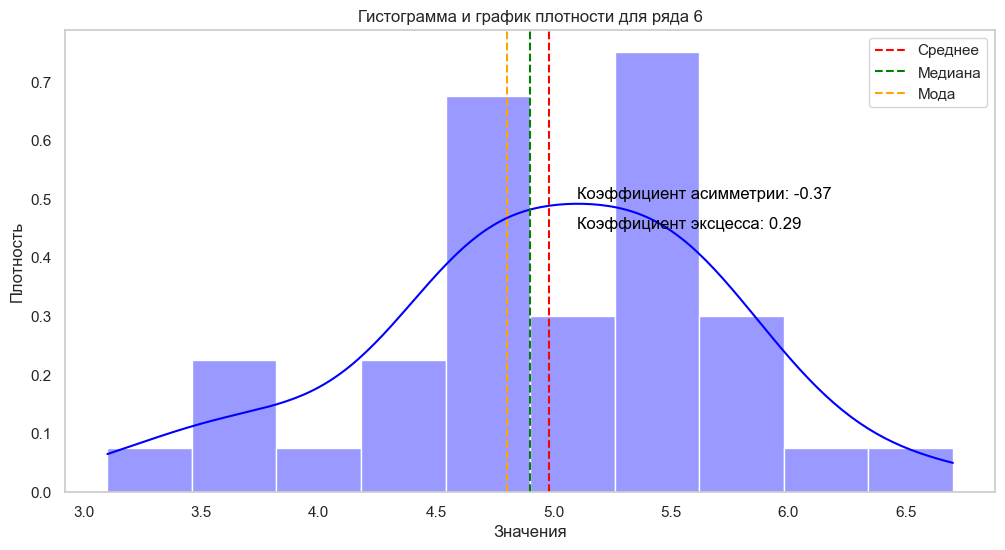

In [21]:
plt.figure(figsize=(12, 6))

sns.histplot(df['6'], kde=True, stat='density', bins=10, color='blue', alpha=0.4)
plt.title('Гистограмма и график плотности для ряда 6')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.axvline(df['6'].mean(), color='red', linestyle='--', label='Среднее')
plt.axvline(df['6'].median(), color='green', linestyle='--', label='Медиана')
plt.axvline(df['6'].mode()[0], color='orange', linestyle='--', label='Мода')

plt.text(x=5.1, y=0.5, s=f'Коэффициент асимметрии: {df["6"].skew():.2f}', fontsize=12, color='black')
plt.text(x=5.1, y=0.45, s=f'Коэффициент эксцесса: {df["6"].kurtosis():.2f}', fontsize=12, color='black')
plt.grid(False)

plt.legend()
plt.show()

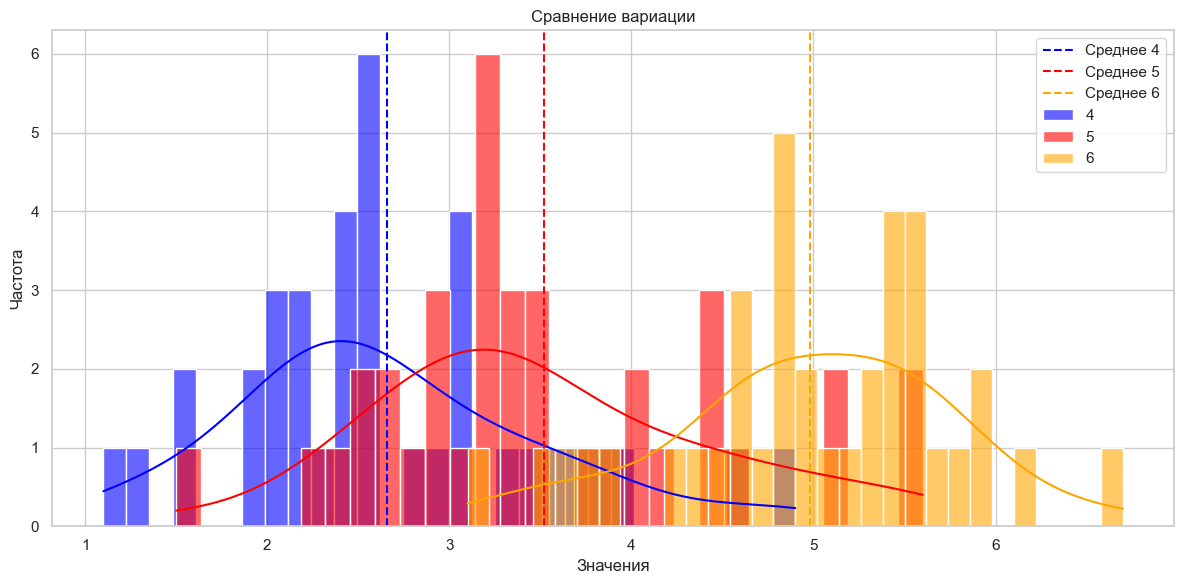

In [22]:
plt.figure(figsize=(12, 6))

sns.histplot(df['4'], bins=30, kde=True, color='blue', alpha=0.6, label='4')
sns.histplot(df['5'], bins=30, kde=True, color='red', alpha=0.6, label='5')
sns.histplot(df['6'], bins=30, kde=True, color='orange', alpha=0.6, label='6')

mean_4 = df['4'].mean()
mean_5 = df['5'].mean()
mean_6 = df['6'].mean()

plt.axvline(mean_4, color='blue', linestyle='--', label='Среднее 4')
plt.axvline(mean_5, color='red', linestyle='--', label='Среднее 5')
plt.axvline(mean_6, color='orange', linestyle='--', label='Среднее 6')

plt.title('Сравнение вариации')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

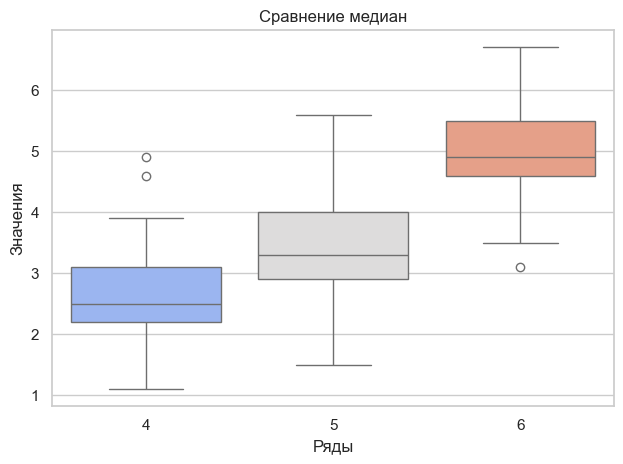

In [23]:
sns.boxplot(data=df[['4', '5', '6']], palette='coolwarm')

plt.title('Сравнение медиан')
plt.xlabel('Ряды')
plt.ylabel('Значения')

plt.tight_layout()
plt.show()

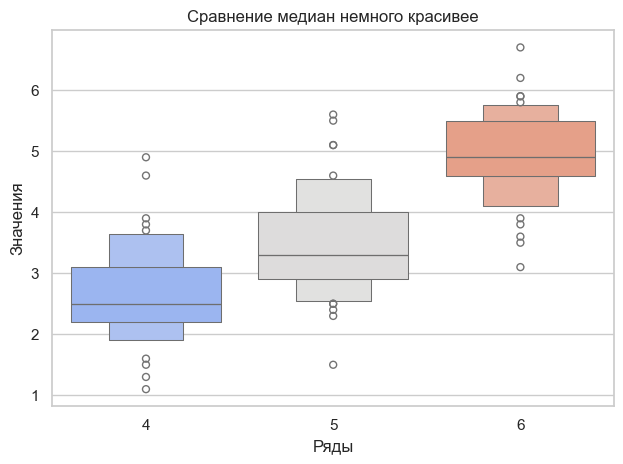

In [24]:
sns.boxenplot(data=df[['4', '5', '6']], palette='coolwarm')

plt.title('Сравнение медиан немного красивее')
plt.xlabel('Ряды')
plt.ylabel('Значения')

plt.tight_layout()
plt.show()

### РАСЧЕТЫ СВОИМИ РУЧКАМИ

In [25]:
def mi_count(col):
    #минимальное и максимальное значения
    xmin = col.min()
    xmax = col.max()
    
    #размах (диапазон) выборки
    R = xmax-xmin
    
    #количество интервалов по формуле Стерджеса
    n = len(df)
    N = round(1 + 3.322 * np.log10(n))
    
    #величина интервала
    h = (xmax - xmin) / N
    
    #границы интервалов
    intervals = [(xmin + i * h, xmin + (i + 1) * h) for i in range(N)]
    
    #абсолютные частоты
    absolute_frequencies = []
    for interval in intervals:
        count = df[(col >= interval[0]) & (col < interval[1])].shape[0]
        absolute_frequencies.append(count)
    
    #относительные частоты
    relative_frequencies = [f / n for f in absolute_frequencies]
    
    #середины интервалов
    midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]
    
    #выполнение условий нормировки для абсолютных и относительных частот
    absolute_sum = sum(absolute_frequencies)
    relative_sum = sum(relative_frequencies)
    result_df = pd.DataFrame({
        'Интервал': [f'({interval[0]:.2f}, {interval[1]:.2f})' for interval in intervals],
        'Абсолютная частота (mi)': absolute_frequencies,
        'Относительная частота (wi)': relative_frequencies,
        'Середина интервала (xi)': midpoints
    })

    return result_df

mi_4_df = mi_count(df['4'])
mi_5_df = mi_count(df['5'])
mi_6_df = mi_count(df['6'])

In [26]:
mi_4_df


,Интервал,Абсолютная частота (mi),Относительная частота (wi),Середина интервала (xi)
0,"(1.10, 1.73)",4,0.108108,1.416667
1,"(1.73, 2.37)",9,0.243243,2.050000
2,"(2.37, 3.00)",14,0.378378,2.683333
3,"(3.00, 3.63)",5,0.135135,3.316667
4,"(3.63, 4.27)",3,0.081081,3.950000
5,"(4.27, 4.90)",1,0.027027,4.583333


In [27]:
mi_5_df


,Интервал,Абсолютная частота (mi),Относительная частота (wi),Середина интервала (xi)
0,"(1.50, 2.18)",1,0.027027,1.841667
1,"(2.18, 2.87)",7,0.189189,2.525000
2,"(2.87, 3.55)",16,0.432432,3.208333
3,"(3.55, 4.23)",5,0.135135,3.891667
4,"(4.23, 4.92)",4,0.108108,4.575000
5,"(4.92, 5.60)",3,0.081081,5.258333


In [28]:
mi_6_df


,Интервал,Абсолютная частота (mi),Относительная частота (wi),Середина интервала (xi)
0,"(3.10, 3.70)",3,0.081081,3.4
1,"(3.70, 4.30)",2,0.054054,4.0
2,"(4.30, 4.90)",12,0.324324,4.6
3,"(4.90, 5.50)",10,0.270270,5.2
4,"(5.50, 6.10)",8,0.216216,5.8
5,"(6.10, 6.70)",1,0.027027,6.4


In [29]:
# Функция для вычисления статистических показателей
def compute_statistics(data):
    df = pd.DataFrame(data)
    df['Абсолютная частота (mi)'] = df['Абсолютная частота (mi)'].astype(float)
    df['Середина интервала (xi)'] = df['Середина интервала (xi)'].astype(float)

    n = df['Абсолютная частота (mi)'].sum()
    mean = (df['Абсолютная частота (mi)'] * df['Середина интервала (xi)']).sum() / n
    
    df['(xi - x̄)²'] = (df['Середина интервала (xi)'] - mean) ** 2
    df['(xi - x̄)³'] = (df['Середина интервала (xi)'] - mean) ** 3
    df['(xi - x̄)⁴'] = (df['Середина интервала (xi)'] - mean) ** 4

    variance = (df['Абсолютная частота (mi)'] * df['(xi - x̄)²']).sum() / n
    corrected_variance = (df['Абсолютная частота (mi)'] * df['(xi - x̄)²']).sum() / (n - 1)
    std_dev = np.sqrt(variance)
    cv = std_dev / mean

    skewness = (df['Абсолютная частота (mi)'] * df['(xi - x̄)³']).sum() / (n * std_dev ** 3)
    kurtosis = (df['Абсолютная частота (mi)'] * df['(xi - x̄)⁴']).sum() / (n * std_dev ** 4) - 3

    return df, {
        'n': round(n,1),
        'mean': round(mean,2),
        'variance': round(variance,2),
        'corrected_variance': round(corrected_variance,2),
        'std_dev': round(std_dev,2),
        'cv': round(cv,2),
        'skewness': round(skewness,2),
        'kurtosis': round(kurtosis,2)
    }

df1, stats1 = compute_statistics(mi_4_df)
df2, stats2 = compute_statistics(mi_5_df)
df3, stats3 = compute_statistics(mi_6_df)

#Собираем результаты
results = pd.DataFrame({
    'Показатель': [
        'n', 'Среднее', 'Дисперсия', 'Исправленная дисперсия', 'Стандартное отклонение',
        'Коэффициент вариации', 'Коэффициент асимметрии', 'Коэффициент эксцесса'
    ],
    '4': [
        stats1['n'], stats1['mean'], stats1['variance'], stats1['corrected_variance'],
        stats1['std_dev'], stats1['cv'], stats1['skewness'], stats1['kurtosis']
    ],
    '5': [
        stats2['n'], stats2['mean'], stats2['variance'], stats2['corrected_variance'],
        stats2['std_dev'], stats2['cv'], stats2['skewness'], stats2['kurtosis']
    ],
    '6': [
        stats3['n'], stats3['mean'], stats3['variance'], stats3['corrected_variance'],
        stats3['std_dev'], stats3['cv'], stats3['skewness'], stats3['kurtosis']
    ]
})

print("Основные данные для каждой таблицы:")
results

Основные данные для каждой таблицы:


,Показатель,4,5,6
0,n,36.00,36.00,36.00
1,Среднее,2.63,3.46,4.95
2,Дисперсия,0.57,0.70,0.53
3,Исправленная дисперсия,0.58,0.72,0.54
4,Стандартное отклонение,0.75,0.84,0.73
5,Коэффициент вариации,0.29,0.24,0.15
6,Коэффициент асимметрии,0.46,0.64,-0.38
7,Коэффициент эксцесса,-0.01,-0.19,-0.23


In [30]:
# Вывод значений (xi - x̄)², (xi - x̄)³ и (xi - x̄)⁴ для каждой таблицы
for i, df_in in enumerate([df1, df2, df3], start=1):
    print(f"\nМесяц {i} - Разности:")
    display_columns = ['Интервал', 'Середина интервала (xi)', '(xi - x̄)²', '(xi - x̄)³', '(xi - x̄)⁴']
    print(df_in[display_columns].to_string(index=False))


Месяц 1 - Разности:
    Интервал  Середина интервала (xi)  (xi - x̄)²  (xi - x̄)³  (xi - x̄)⁴
(1.10, 1.73)                 1.416667    1.473526   -1.788697    2.171280
(1.73, 2.37)                 2.050000    0.337045   -0.195673    0.113599
(2.37, 3.00)                 2.683333    0.002785    0.000147    0.000008
(3.00, 3.63)                 3.316667    0.470748    0.322986    0.221604
(3.63, 4.27)                 3.950000    1.740934    2.297065    3.030850
(4.27, 4.90)                 4.583333    3.813341    7.446608   14.541570

Месяц 2 - Разности:
    Интервал  Середина интервала (xi)  (xi - x̄)²  (xi - x̄)³  (xi - x̄)⁴
(1.50, 2.18)                 1.841667    2.603143   -4.199979    6.776355
(2.18, 2.87)                 2.525000    0.865072   -0.804597    0.748350
(2.87, 3.55)                 3.208333    0.060890   -0.015025    0.003708
(3.55, 4.23)                 3.891667    0.190597    0.083210    0.036327
(4.23, 4.92)                 4.575000    1.254193    1.404580    1.572

### Измерение взаимной зависимости
1. **Коэффициент корреляции** между рядами X и Y:
$
r_{xy} = \frac{S_{xy}}{S_x S_y}
$

где:
$
S_x = \sqrt{S_{x}^2}, \quad S_y = \sqrt{S_{y}^2}
$
$
S_y = \sqrt{\frac{1}{n-1} \sum_{j=1}^{n} (y_j - \bar{y})^2}, \quad S_x = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$

2. **Ковариация** $(S_{xy})$:
$
S_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$

3. **Среднеквадратическая ошибка** $(\sigma_r)$ линейного коэффициента корреляции:
$
\sigma_r = \sqrt{\frac{1 - r_{xy}^2}{n - 2}}
$

4. **Критерий Стьюдента** для проверки нулевой гипотезы:
$
t_{\text{расч}} = \frac{r_{xy}}{\sigma_r}
$

5. **Доверительный интервал** $((\theta, \theta))$ для коэффициента корреляции $(r_{xy})$ с надежностью $(\gamma = 1 - \alpha)$:
$
\theta = e^{2\alpha - 1} \leq r_{xy} \leq e^{2\beta - 1} = \theta
$

где:
$
\alpha = 0.5 \ln(1 + r_{xy}) - z_{\gamma} \frac{1 - r_{xy}}{\sqrt{n - 3}}
$
$
\beta = 0.5 \ln(1 + r_{xy}) + z_{\gamma} \frac{1 - r_{xy}}{\sqrt{n - 3}}
$

6. **Функция Лапласа**:
$
\Phi_0(z_{\gamma}) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{z} e^{-x^2/2} dx
$

In [31]:
from scipy import stats
corr, p_value = stats.pearsonr(df['5'], df['6'])

In [32]:
print(round(corr,4), round(p_value,4))

0.0897 0.5977


In [33]:
Mx = df['5'].mean()
My = df['6'].mean()

n = len(df)
Sx = np.sqrt(((df['5'] - Mx) ** 2).sum() / n)
Sy = np.sqrt(((df['6'] - My) ** 2).sum() / n)

# Расчет ковариации
Sxy = ((df['5'] - Mx) * (df['6'] - My)).sum() / n

# Расчет коэффициента корреляции
rxy = Sxy / (Sx * Sy)

# Использование встроенной функции для проверки
corr, p_value = stats.pearsonr(df['5'], df['6'])

# Вывод результатов
print(f"Ковариация Sxy: {Sxy:.4f}")
print(f"Коэффициент корреляции (вручную): {rxy:.4f}")
print(f"Коэффициент корреляции (встроенная функция): {corr:.4f}, p-значение: {p_value:.4f}")

Ковариация Sxy: 0.0626
Коэффициент корреляции (вручную): 0.0897
Коэффициент корреляции (встроенная функция): 0.0897, p-значение: 0.5977


## Вывод

### Ковариация
Ковариация составляет 0.0626, что указывает на положительную зависимость: при увеличении значений переменной X (столбец '5') значения Y (столбец '6') также имеют тенденцию к увеличению. Однако, это значение достаточно мало, что свидетельствует о слабой взаимосвязи.

### Коэффициент корреляции
Рассчитанный коэффициент корреляции равен 0.0897, что совпадает с результатом, полученным через функцию `stats.pearsonr`. Это подтверждает правильность расчетов. Значение близко к нулю, указывая на слабую линейную зависимость между переменными.

### p-значение
p-значение равно 0.5977, что говорит о статистической незначимости корреляции. Поскольку оно значительно выше 0.05, мы не можем отвергнуть нулевую гипотезу о том, что между переменными нет линейной зависимости.

### Общий вывод
На основании полученных данных можно заключить, что между температурами воды в переменных X и Y наблюдается очень слабая и несущественная линейная зависимость. Это может указывать на влияние других факторов на температуру воды, что делает простую линейную корреляцию недостаточной для понимания всей сложности взаимосвязей.

In [34]:
sigma_r = np.sqrt((1-(rxy**2))/(n-2))
sigma_r

np.float64(0.16835017071721747)

Выдвигаем нулевую гипотезу о равенстве нулю генерального коэффициента корреляции 
***H0: r = 0***, для проверки которой рассчитать ***критерий Стьюдента*** tрасч:
$t_{\text{расч}} = \frac{r_{xy}}{\sigma_r}$

In [35]:
trach = rxy/sigma_r
trach

np.float64(0.53254014666127)

In [36]:
#степень свободы
k = n - 2

#уровни значимости
alpha_1 = 0.025
alpha_2 = 0.01
#находим критическую точку t-критерия Стьюдента
t_k1 = stats.t.ppf(1 - alpha_1/2, k)  # Двусторонний тест
t_k2 = stats.t.ppf(1 - alpha_2/2, k)

print(f"Коэффициент свободы: {k}")
print(f"Коэффициент корреляции: {rxy:.4f}")
print(f"t-статистика: {trach:.4f}")

print('')
print("Используя фстроенную функцию:")
print(f"Критическая точка 1: {t_k1:.4f}")
print(f"Критическая точка 2: {t_k2:.4f}")

#С ПОМОЩЬЮ ВСТРОЕННЫХ ФУНКЦИЙ
if abs(trach) < t_k1:
    print("Не отвергаем нулевую гипотезу H0 для ур значимости 1: r = 0")
else:
    print("Отвергаем нулевую гипотезу H0 для ур значимости 1: r = 0. Существуют значимые корреляции.")

if abs(trach) < t_k2:
    print("Не отвергаем нулевую гипотезу H0 для ур значимости 2: r = 0")
else:
    print("Отвергаем нулевую гипотезу H0 для ур значимости 2: r = 0. Существуют значимые корреляции.")

#С ПОМОЩЬЮ ТАБЛИЦЫ
t_k1_table = 2.440
t_k2_table = 2.720
print('')
print("Используя таблицу:")
print("Критическая точка 1 =", t_k1_table, "Критическая точка 1 =", t_k2_table )
print("Не отвергаем нулевую гипотезу H0 для ур значимости 1: r = 0")
print("Не отвергаем нулевую гипотезу H0 для ур значимости 2: r = 0")

Коэффициент свободы: 35
Коэффициент корреляции: 0.0897
t-статистика: 0.5325

Используя фстроенную функцию:
Критическая точка 1: 2.3420
Критическая точка 2: 2.7238
Не отвергаем нулевую гипотезу H0 для ур значимости 1: r = 0
Не отвергаем нулевую гипотезу H0 для ур значимости 2: r = 0

Используя таблицу:
Критическая точка 1 = 2.44 Критическая точка 1 = 2.72
Не отвергаем нулевую гипотезу H0 для ур значимости 1: r = 0
Не отвергаем нулевую гипотезу H0 для ур значимости 2: r = 0


Для коэффициента корреляции $( r_{xy} )$ и случая двухмерного нормального распределения ***доверительный интервал*** $((\theta_1, \theta_2))$ с надежностью $(\gamma = 1 - \alpha)$ задается следующим образом:

In [37]:
def count_interval(rxy, alpha, n):
    # Преобразование коэффициента корреляции
    z = 0.5 * np.log((1 + rxy) / (1 - rxy))

    # Стандартная ошибка
    SE_z = 1 / np.sqrt(n - 3)

    # Критическое значение для нормального распределения
    z_alpha_over_2 = stats.norm.ppf(1 - alpha / 2)

    # Доверительный интервал для z
    z_lower = z - z_alpha_over_2 * SE_z
    z_upper = z + z_alpha_over_2 * SE_z

    # Обратное преобразование для получения доверительного интервала для r
    r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
    r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)
    
    return r_lower, r_upper
print("Построение доверительного интервала с помощью встроенных функций")

r_lower_1, r_upper_1 = count_interval(rxy, alpha_1, n)
print("для уровня значимости 1")
print(f"Доверительный интервал для коэффициента корреляции: ({r_lower_1:.4f}, {r_upper_1:.4f})")

r_lower_2, r_upper_2 = count_interval(rxy, alpha_2, n)
print("для уровня значимости 2")
print(f"Доверительный интервал для коэффициента корреляции: ({r_lower_2:.4f}, {r_upper_2:.4f})")



Построение доверительного интервала с помощью встроенных функций
для уровня значимости 1
Доверительный интервал для коэффициента корреляции: (-0.2863, 0.4417)
для уровня значимости 2
Доверительный интервал для коэффициента корреляции: (-0.3380, 0.4866)


***Для уровня значимости 1***

In [38]:
gamma1 = 1 - alpha_1
f_l_Zgamma_1 = gamma1/2
f_l_Zgamma_1

0.4875

In [39]:
Zgamma_1 = 2.24 #из таблицы

In [40]:
a_1 = (0.5*np.log((1 + rxy) / (1 - rxy))) - (Zgamma_1/(n-3)**0.5)
b_1 = (0.5*np.log((1 + rxy) / (1 - rxy))) + (Zgamma_1/(n-3)**0.5)
print("a1=", round(a_1,4), "b1=", round(b_1,4))

a1= -0.2943 b1= 0.4741


In [41]:
teta_low_1 = (np.exp(2 * a_1) - 1) / (np.exp(2 * a_1) + 1)
teta_up_1 = (np.exp(2 * b_1) - 1) / (np.exp(2 * b_1) + 1)
print("Вручную для уровня значимости 1")
print(f"Доверительный интервал для коэффициента корреляции:")
print("(", round(teta_low_1,4), ",", round(teta_up_1,4), ")")

Вручную для уровня значимости 1
Доверительный интервал для коэффициента корреляции:
( -0.2861 , 0.4415 )


***Для уровня значимости 2***

In [42]:
gamma2 = 1 - alpha_2
f_l_Zgamma_2 = gamma2/2
f_l_Zgamma_2

0.495

In [43]:
Zgamma_2 = 2.58 #из таблицы

In [44]:
a_2 = (0.5*np.log((1 + rxy) / (1 - rxy))) - (Zgamma_2/(n-3)**0.5)
b_2 = (0.5*np.log((1 + rxy) / (1 - rxy))) + (Zgamma_2/(n-3)**0.5)
print("a2=", round(a_2,4), "b2=", round(b_2,4))

a2= -0.3526 b2= 0.5324


In [45]:
teta_low_2 = (np.exp(2 * a_2) - 1) / (np.exp(2 * a_2) + 1)
teta_up_2 = (np.exp(2 * b_2) - 1) / (np.exp(2 * b_2) + 1)
print("Вручную для уровня значимости 2")
print(f"Доверительный интервал для коэффициента корреляции:")
print("(", round(teta_low_2,4), ",", round(teta_up_2,4), ")")

Вручную для уровня значимости 2
Доверительный интервал для коэффициента корреляции:
( -0.3387 , 0.4872 )


In [46]:
round(Sx,4)

np.float64(0.9176)

In [47]:
round(Sy,4)

np.float64(0.7606)

In [48]:
round(Sxy,4)

np.float64(0.0626)

### ***Расчет коэффициентов линейного уравнения регрессии***

## Уравнение линейной регрессии

Рассмотрим уравнение линейной регрессии $( y^*(x) = ax + b )$.

### 1. Оценка параметров a и b

Оценки параметров линейной регрессионной модели вычисляются по следующим формулам:
$
a = \frac{S_{xy}}{S_x^2}, \quad b = \bar{y} - a \bar{x}
$
где:
- $( S_{xy} )$ — ковариация между X и Y,
- $(S_x^2 )$ — дисперсия переменной X,
- $( \bar{x} )$ и $( \bar{y} )$ — средние значения X и Y соответственно.

### 2. Построение графика

Построить график зависимости между статистическими рядами X и Y, на котором провести линию регрессии $( y^*(x) = ax + b)$

### 3. Дисперсия отклонения

Дисперсия отклонения вычисляется по формуле:
$
\sigma^2_{\epsilon y} = S^2(1 - r^2)
$
где:
- $( S^2 )$ — дисперсия зависимой переменной Y,
- r — коэффициент корреляции между X и Y.

### 4. Стандартные случайные погрешности параметров a и b 

Стандартные погрешности параметров вычисляются по следующим формулам:
$
\sigma_a = \frac{\sigma_{\epsilon}}{S_x}, \quad \sigma_b = \sigma_{\epsilon} \sqrt{1 + \frac{x^2}{S_x^2(n - 2)}}
$
где n — объем выборки.

### 5. Оценка значимости коэффициентов регрессии

Для проверки значимости коэффициентов регрессии выдвигаем нулевую гипотезу $( H_0: a = 0, b = 0 )$ и рассчитываем критерии Стьюдента:
$
T_a = \frac{a}{\sigma_a}, \quad T_b = \frac{b}{\sigma_b}
$

Если $( |T_a| )$ или $( |T_b| )$ превышает критическое значение по таблице распределения Стьюдента, то мы отвергаем нулевую гипотезу.

In [49]:
sum_x = np.sum(df['5'])
sum_y = np.sum(df['6'])
sum_xy = np.sum(df['5'] * df['6'])
sum_x2 = np.sum(df['5']** 2)

#расчет коэффициентов a и b
a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b = (sum_y - a * sum_x) / n

print(f"Коэффициент наклона a: {a:.2f}")
print(f"Свободный член b: {b:.2f}")

Коэффициент наклона a: 0.07
Свободный член b: 4.72


In [50]:
#проверим расчеты 
#используем метод полиномиальной регрессии с 1 степенью
coefficients = np.polyfit(df['5'], df['6'], 1)
a, b = coefficients

print(f"Коэффициент наклона a: {a:.2f}")
print(f"Свободный член b: {b:.2f}")

Коэффициент наклона a: 0.07
Свободный член b: 4.72


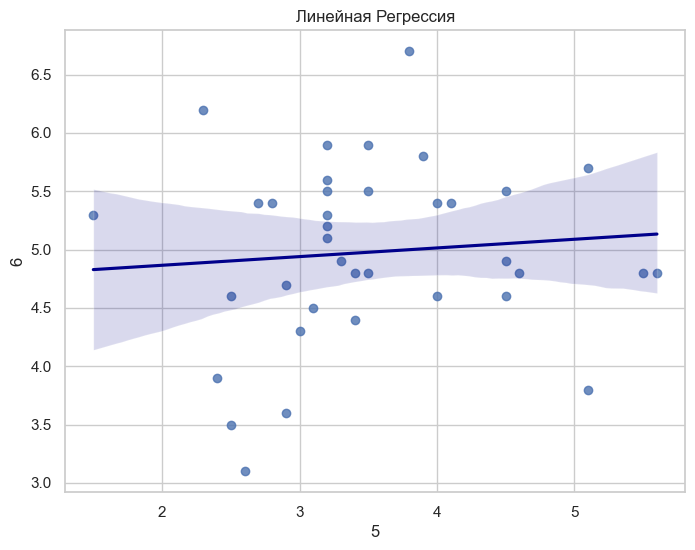

In [51]:
plt.figure(figsize=(8, 6))
sns.regplot(x='5', y='6', data=df[['5', '6']], line_kws={'color': 'darkblue'})
plt.title('Линейная Регрессия')
plt.xlabel('5')
plt.ylabel('6')
plt.show()

In [52]:
sigma_e = (Sy**2)*(1-(rxy**2))
round(sigma_e,2)

np.float64(0.57)

Вычисляем стандартные случайные погрешности параметров a, b

In [53]:
sigma_a = (sigma_e**(0.5))/(Sx*((n-2)**(0.5)))
round(sigma_a,2)

np.float64(0.14)

In [54]:
x_ = 3.52
sigma_b = (sigma_e**(0.5))/((n-2)**(0.5)) * ((1+(x_**2)/(Sx**2))**0.5)
round(sigma_b,2)

np.float64(0.51)

### Оцениваем значимость коэффициентов регрессии

In [55]:
Ta = a/sigma_a
Tb = b/sigma_b
print(f"Ta: {Ta:.2f}, Tb: {Tb:.2f}")

Ta: 0.53, Tb: 9.29


k = 35
$
\alpha_1 = 0.025
$
$
\alpha_2 = 0.01
$

Критические значения t-критерия Стьюдента
при заданном уровне значимости a и степени свободы k
из таблицы

In [56]:
tkr_1 = 2.440
tkr_2 = 2.720

Если | Тa | > tкр(k, а), то нулевая гипотеза отвергается и отклонение а от нуля носит неслучайный характер, и, следовательно, величина а значима.

Если | Тb | > tкр(k, а), то нулевая гипотеза отвергается, отклонение b от нуля носит неслучайный характер, и, следовательно, величина b значима.

In [57]:
if abs(Ta) < tkr_1:
    print("Не отвергаем нулевую гипотезу H0")
else:
    print("Отвергаем нулевую гипотезу H0")

if abs(Tb) < tkr_1:
    print("Не отвергаем нулевую гипотезу H0")
else:
    print("Отвергаем нулевую гипотезу H0")

Не отвергаем нулевую гипотезу H0
Отвергаем нулевую гипотезу H0


In [58]:
t_critical_1 = stats.t.ppf(1 - alpha_1 / 2, df=k)
print(f"Критическая точка t-критическая для a1: {t_critical_1:.4f}")
t_critical_2 = stats.t.ppf(1 - alpha_2 / 2, df=k)
print(f"Критическая точка t-критическая для a2: {t_critical_2:.4f}")

Критическая точка t-критическая для a1: 2.3420
Критическая точка t-критическая для a2: 2.7238


***Оценка адекватности регрессионной модели***


Вычислить n значений температуры воды по уравнению регрессии

In [59]:
df['y*'] = a*df['5']+b

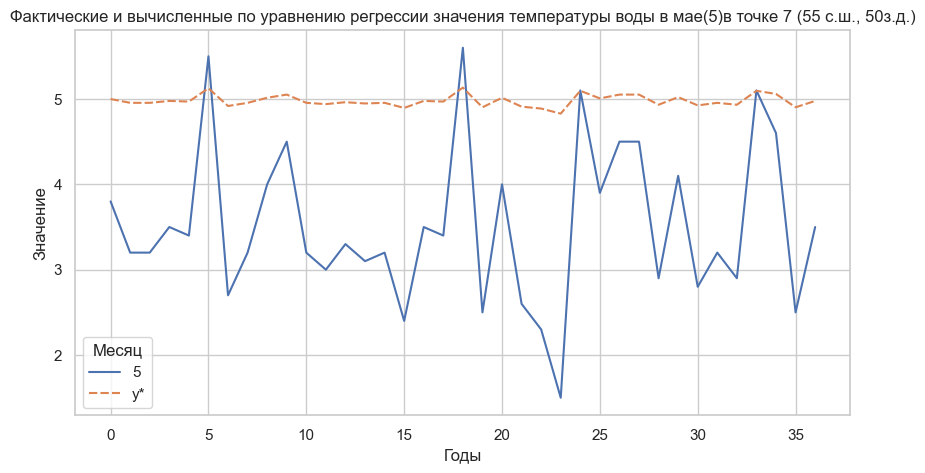

In [60]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.lineplot(data=df[['5', 'y*']])

plt.title('Фактические и вычисленные по уравнению регрессии значения температуры воды в мае(5)в точке 7 (55 с.ш., 50з.д.)')
plt.xlabel('Годы')
plt.ylabel('Значение')
plt.legend(title='Месяц')
plt.show()

In [61]:
df['y*2'] = a*df['6']+b

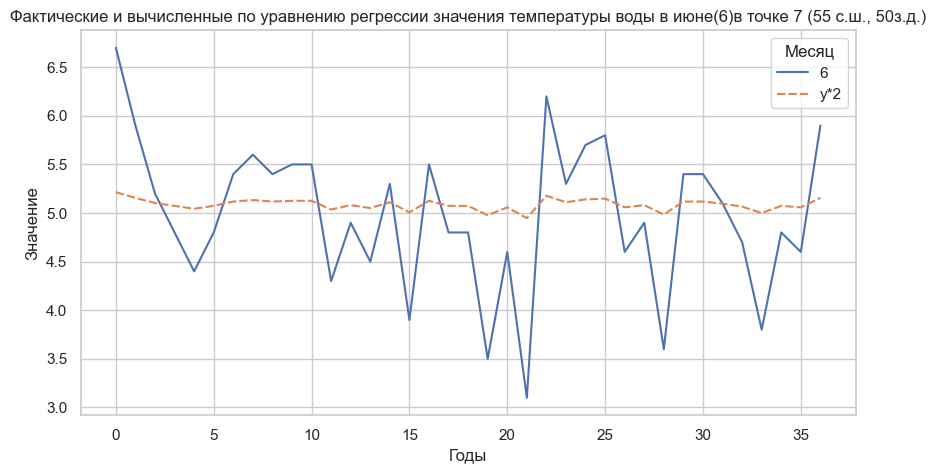

In [62]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.lineplot(data=df[['6', 'y*2']])

plt.title('Фактические и вычисленные по уравнению регрессии значения температуры воды в июне(6)в точке 7 (55 с.ш., 50з.д.)')
plt.xlabel('Годы')
plt.ylabel('Значение')
plt.legend(title='Месяц')
plt.show()

### Как то не то чтобы адекватно)) ПРОВЕРИМ!

                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.2836
Date:                Wed, 22 Oct 2025   Prob (F-statistic):              0.598
Time:                        00:12:44   Log-Likelihood:                -42.225
No. Observations:                  37   AIC:                             88.45
Df Residuals:                      35   BIC:                             91.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7169      0.507      9.296      0.0

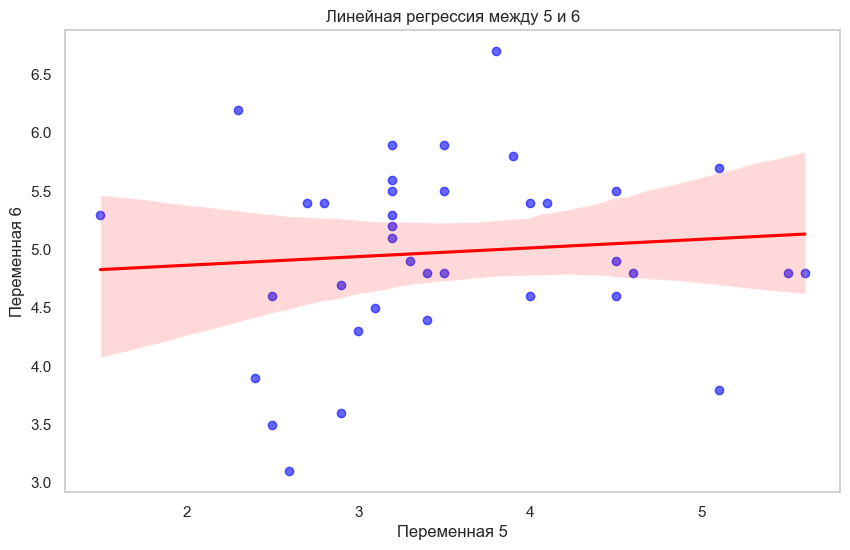

In [63]:
X = df['5']
y = df['6'] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()  # линейная регрессия
predictions = model.predict(X)  

print(model.summary())

plt.figure(figsize=(10, 6))
sns.regplot(x=df['5'], y=df['6'], color='blue', marker='o', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Линейная регрессия между 5 и 6')
plt.xlabel('Переменная 5')
plt.ylabel('Переменная 6')
plt.grid()
plt.show()


In [64]:
#коэффициент детерминации
y_mean = np.mean(y)
delta_squared = np.sum((predictions - y_mean) ** 2) / len(y)
print(round(delta_squared,3))
D = np.sum((y - predictions) ** 2) / len(y)
print(round(D,3))
eta_squared = delta_squared / np.var(y)
print(round(eta_squared,3))

#F-критерий
n = len(y)
F_critical = (n - 2) * delta_squared / D
print(round(F_critical,3))

#значение из таблицы F-критических значений 
F_table = 4.12  #из таблицы

#стандартная ошибка модели
sigma_epsilon = np.sqrt(D) 
S_y = np.std(y, ddof=1)
threshold = 0.67 * S_y  #порог

print(f'Коэффициенты регрессии: a = {a}, b = {b}')
print(f'Коэффициент детерминации (η²): {eta_squared}')
print(f'Дисперсионное отношение (F-крит): {F_critical}')
print(f'Стандартная ошибка модели (σε): {sigma_epsilon}')
print(f'Стандартное отклонение исходного ряда (Sy): {S_y}')
print(f'Пороговое значение (0.67 * Sy): {threshold}')

if F_critical > F_table:
    print("Нулевая гипотеза отвергается. Модель значима.")
else:
    print("Нулевая гипотеза не отвергается. Модель не значима.")

#роверка условий качества модели
if eta_squared > 0.7:
    print("Модель адекватна по коэффициенту детерминации.")
else:
    print("Модель неадекватна по коэффициенту детерминации.")
    
#проверка стандартной ошибки
if sigma_epsilon < threshold:
    print("Стандартная ошибка модели меньше 0.67 стандартного отклонения исходного ряда. Модель адекватна.")
else:
    print("Стандартная ошибка модели больше или равна 0.67 стандартного отклонения исходного ряда. Модель неадекватна.")


0.005
0.574
0.008
0.284
Коэффициенты регрессии: a = 0.07430603747397625, b = 4.716901457321305
Коэффициент детерминации (η²): 0.008037700681930677
Дисперсионное отношение (F-крит): 0.2835990078060109
Стандартная ошибка модели (σε): 0.7574971980073774
Стандартное отклонение исходного ряда (Sy): 0.7710509188889664
Пороговое значение (0.67 * Sy): 0.5166041156556075
Нулевая гипотеза не отвергается. Модель не значима.
Модель неадекватна по коэффициенту детерминации.
Стандартная ошибка модели больше или равна 0.67 стандартного отклонения исходного ряда. Модель неадекватна.


### Итог:
Модель не значима.
Модель неадекватна по коэффициенту детерминации. 
Модель неадекватна.

### Отчет с остальными выводами в папке проекта